In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255, X_test/255

X_train = X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1),
                padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64,(2,2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [3]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=5, verbose=1,
                validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1133 - accuracy: 0.9650 - val_loss: 0.0386 - val_accuracy: 0.9867
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0453 - accuracy: 0.9859 - val_loss: 0.0585 - val_accuracy: 0.9825
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0329 - accuracy: 0.9891 - val_loss: 0.0339 - val_accuracy: 0.9886
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0250 - accuracy: 0.9921 - val_loss: 0.0259 - val_accuracy: 0.9925
Epoch 5/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0351 - val_accuracy: 0.9903


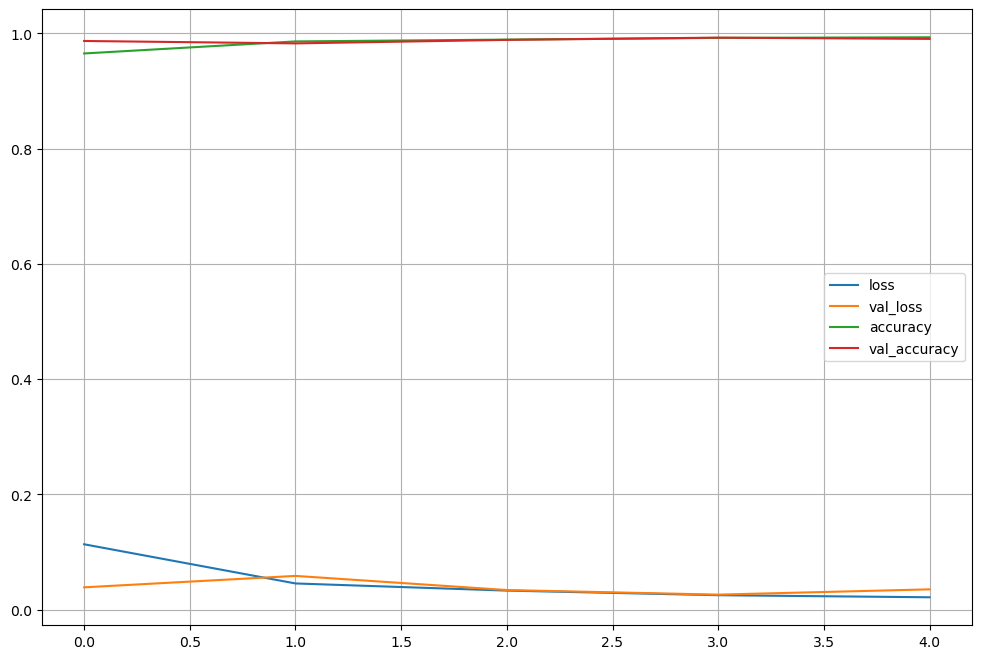

In [6]:
import matplotlib.pyplot as plt

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

In [7]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
print('Predict num :', predicted_labels[:10])
print('Real num :   ',y_test[:10])

313/313 [==============================] - 2s 6ms/step
Predict num : [7 2 1 0 4 1 4 9 5 9]
Real num :    [7 2 1 0 4 1 4 9 5 9]


In [8]:
wrong_result = []

for n in range(0,len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

97

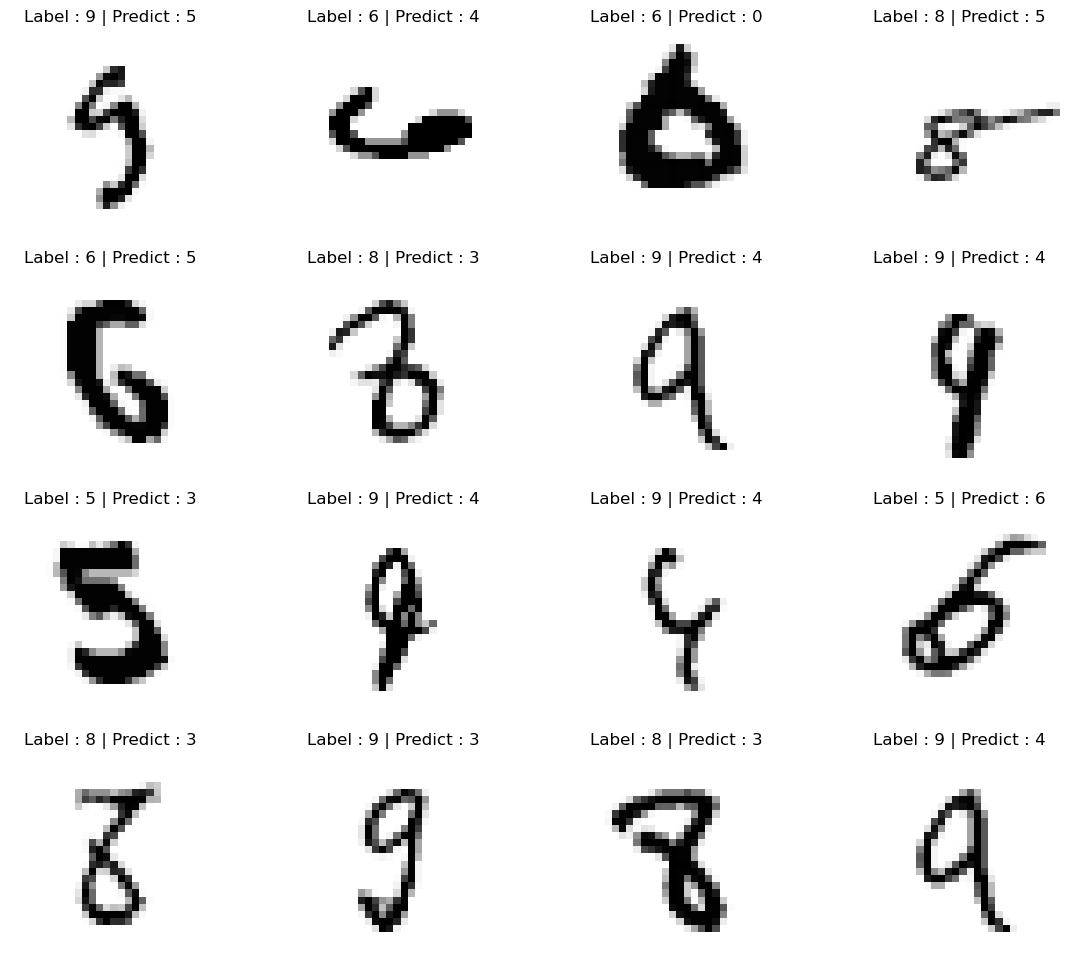

In [9]:
import random

samples = random.choices(population=wrong_result, k=16)

plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4,4,idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys')
    plt.title('Label : '+str(y_test[n]) + ' | Predict : '+ str(predicted_labels[n]))
    plt.axis('off')

plt.show()